# Optimisation: xNES

This example shows you how to run a global optimisation with [xNES](http://pints.readthedocs.io/en/latest/optimisers/xnes.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./first-example.ipynb).

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time m:s
0     6      2868591   2868591    0:00.0
1     12     2868591   3361768    0:00.0
2     18     2868591   3614739    0:00.0
3     24     2868591   4791992    0:00.0
20    126    119073.5  676714.8   0:00.0
40    246    102523.5  102639.2   0:00.0
60    366    102447.3  102447.3   0:00.0
80    486    102447.3  102447.3   0:00.0
100   606    102447.3  102447.3   0:00.1
120   726    102447.3  102447.3   0:00.1
140   846    102447.3  102447.3   0:00.1
160   966    102447.3  102447.3   0:00.1
180   1086   102447.3  102447.3   0:00.1
200   1206   102447.3  102447.3   0:00.1
220   1326   102447.3  102447.3   0:00.1
240   1446   102447.3  102447.3   0:00.1
260   1566   102447.3  102447.3   0:00.2
280   1686   102447.3  102447.3   0:00.2
300   1806   102447.3  102447.3   0:00.2
320   1926   102447.3  102447.3   0:00.2
340   2046   10

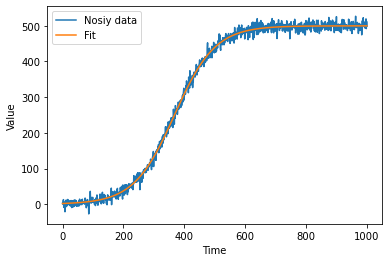

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.011, 400
sigma0 = [0.01, 100]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.XNES,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(times, values, label='Nosiy data')
plt.plot(times, problem.evaluate(found_parameters), label='Fit')
plt.legend()
plt.show()